<a href="https://colab.research.google.com/github/purangi/tensorflow/blob/main/MNIST_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


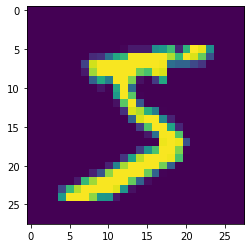

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)
y_train_shape: (60000, 10)
y_test_shape: (10000, 10)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2861 - acc: 0.9177 - val_loss: 0.1542 - val_acc: 0.9553
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1273 - acc: 0.9637 - val_loss: 0.1185 - val_acc: 0.9653
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0864 - acc: 0.9739 - val_loss: 0.0964 - val_acc: 0.9708
Ep

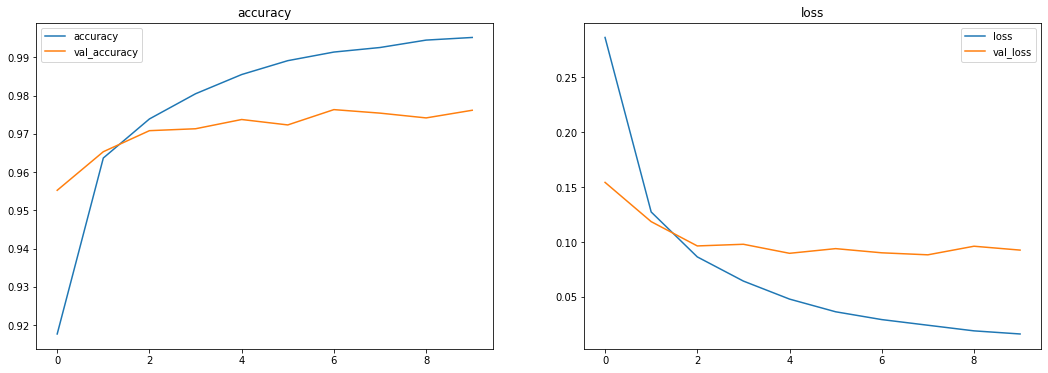

In [1]:
#참고 포스트 : https://velog.io/@tmddn0311/mnist-classification

import matplotlib.pyplot as plt #그림으로 보기 위한 matplotlib 라이브러리 import
from tensorflow.keras.datasets import mnist #MNIST 데이터셋
from tensorflow.keras.utils import to_categorical #one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential #레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense #완전연결층 = fully connected layer
from tensorflow.keras.models import load_model #저장된 모델 불러오기

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}") # X_train_shape : (60000,28,28)
print(f"y_train_shape: {y_train.shape}") # y_train_shape : (60000, )
print(f"X_test_shape: {X_test.shape}") # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}") # y_test_shape: (10000, )

plt.imshow(X_train[0])
plt.show()

input_shape = X_train.shape[1] * X_train.shape[2] # 그림의 크기 : 28 * 28
number_of_classes = len(set(y_train)) #레이블 종류, 0~9개로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape) # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}") # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}") # X_test_shape: (10000, 784)

y_train = to_categorical(y_train, number_of_classes) #원핫 인코딩, 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes) 

print(f"y_train_shape: {y_train.shape}") # y_train_shape : (60000,10)
print(f"y_test_shape: {y_test.shape}") # y_test_shape : (10000, 10)

model = Sequential() # 모델 선언

# 완전연결층 추가, 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
model.add(Dense(128, activation = "relu", input_shape = X_train.shape[1:]))

#출력하는 완전연결층 추가, 다중분류이므로, softmax 활성화함수 사용
model.add(Dense(y_train.shape[1], activation="softmax"))

#모델 컴파일, 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary() #간단 출력

history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)
loss, acc = model.evaluate(X_test, y_test) #학습 완료 후 검증
print("손실률: ", loss) 
print("정확도: ", acc)

#학습 시각화
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()